In [28]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import pandas as pd
#fbprophet 시계열 예측을 위한 라이브러리
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
# 코로나 국내 현황 시계열 데이터 불러오기
data = pd.read_csv("C:/Users/USER/Desktop/jin/data/Time.csv", encoding = "cp949", engine = "python")
confirmed = data[['date', 'confirmed']]



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


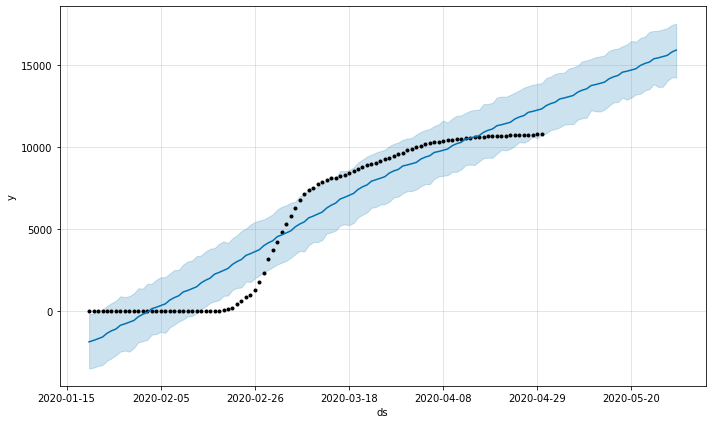

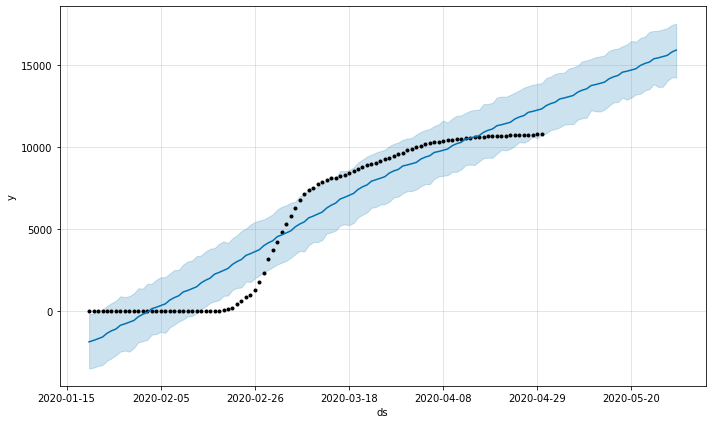

In [26]:
m = Prophet()
m.fit(confirmed_prophet)

future = m.make_future_dataframe(periods=30)
future

forecast = m.predict(future)



m.plot(forecast)




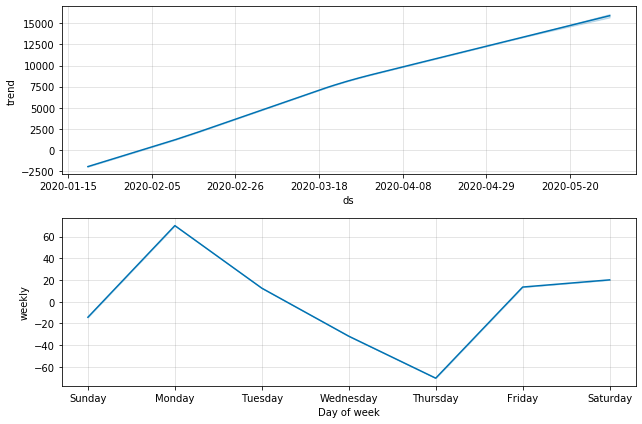

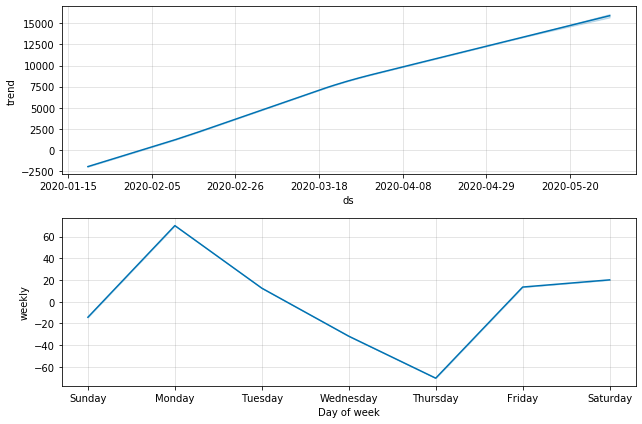

In [21]:
m.plot_components(forecast2)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


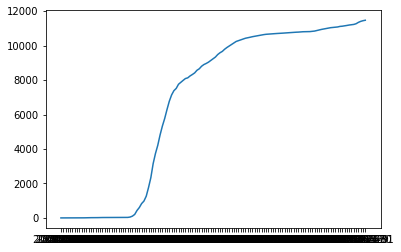

In [27]:
from matplotlib import pyplot as plt
import numpy as np
data2 = pd.read_csv("C:/Users/USER/Desktop/jin/data/Time2.csv", encoding = "cp949", engine = "python")
confirmed2 = data2[['date', 'confirmed']]

x = confirmed2['date']
y = confirmed2['confirmed']

plt.plot(x, y)
plt.show()




In [29]:
#2월 17일 전까지 dataframe 만들기
ifcon=data[['date','day_confirmed']][0:28]
ifcon.tail()


#dataframe값들로 확진자 증감 시도표 그리기
fig = go.Figure()
fig.add_trace(go.Scatter(x=ifcon.date, y=ifcon.day_confirmed,marker_color='orange',name='신천지 전 확진자 증감 시도표'))
fig

KeyError: "['day_confirmed'] not in index"

In [ ]:
#fbprophet을 위한 dataframe
ifcon_prophet = ifcon.rename(columns={'date': 'ds','day_confirmed': 'y'})
ifcon_prophet.head()
#Prophet 객체 생성하고 fit 해준다. 
m=Prophet()
m.fit(ifcon_prophet)
#예측할 미래 dataframe 만들기(30일)
future=m.make_future_dataframe(periods=30)
future
future.tail()
##신천지 전의 데이터는 수가 적고 일정한 형태로 나타나지 않기 떄문에 불확실성을 추가해준다.
#불확실성의 범위 보기
forecast = Prophet(interval_width=0.95).fit(ifcon_prophet).predict(future)
#시즈널리티의 불확실성을 알기 위해 베이지안 샘플링을 사용해야 함,mcmc.samples 파라미터를 사용. 이 값을 사용하면 최초 n일에 대해 적용한다는 뜻
m = Prophet(mcmc_samples=30)
forecast = m.fit(ifcon_prophet).predict(future)
fig = m.plot_components(forecast)
#불투명한 구간이 불확실한 오차구간